## Tobigs 3주차 Clustering 과제
#### 15기 이윤정
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.rename(columns={"Annual Income (k$)" : "Annual_Income", "Spending Score (1-100)" : "Spending_Score"}, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [7]:
#CustomerID feature 제거
data = data.drop('CustomerID', axis=1)

In [8]:
#Gender 변수 0,1로 변환
data['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
data

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


---
### EDA

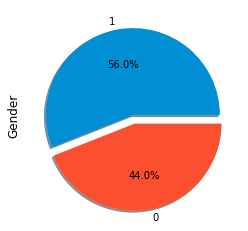

In [9]:
data['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

성별에 있어 큰 차이는 없지만, 여성의 방문율이 조금 더 높다.

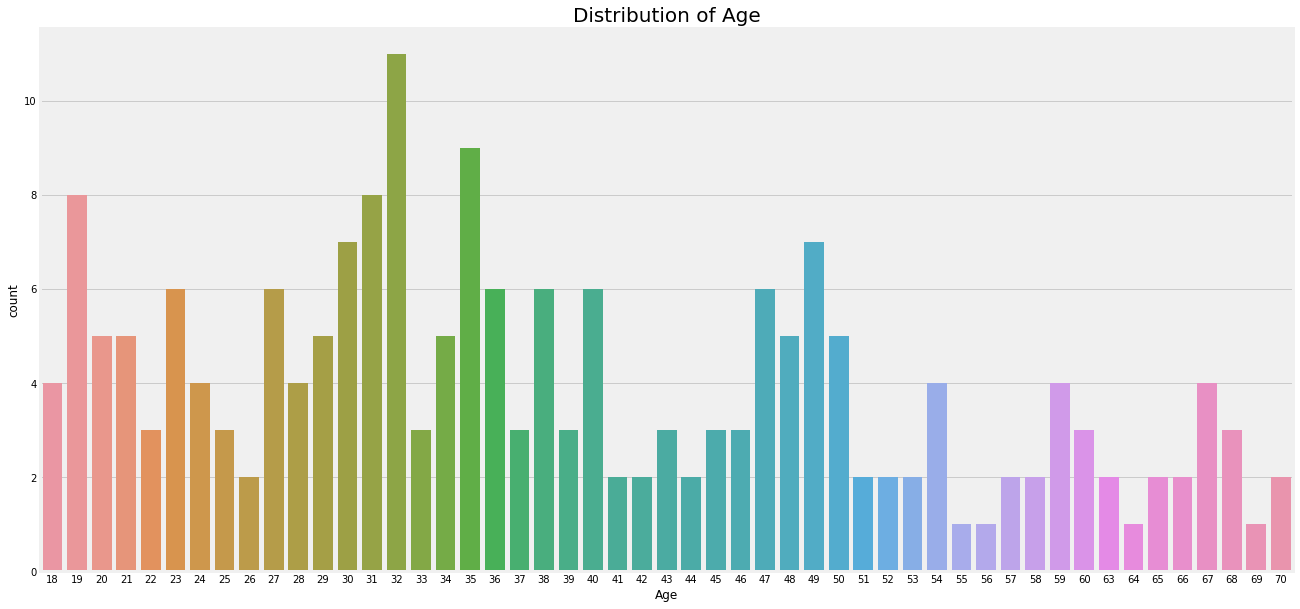

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.show()

In [11]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

중장년층(40대-70대)보다는 청년층(10대-30대)의 방문율이 높으며, 32세의 방문 빈도가 가장 높다.

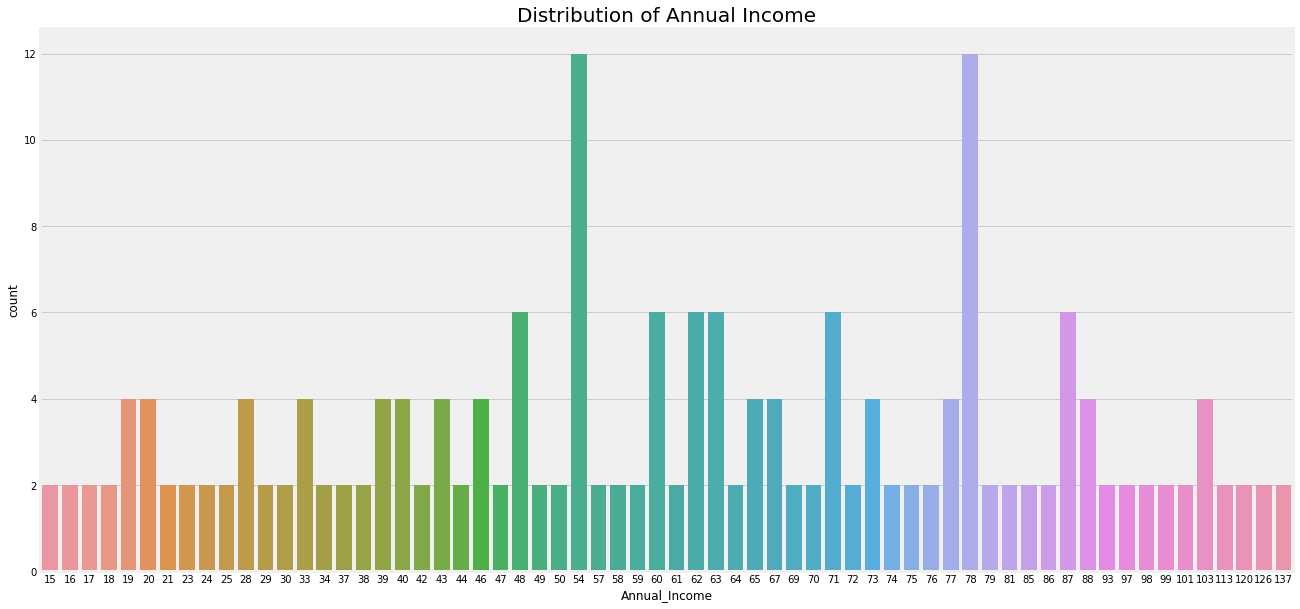

In [12]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['Annual_Income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

In [13]:
data['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

쇼핑몰 방문객의 연간 수입 빈도는 54, 78달러일 때 가장 높았다. 전체 수입을 저소득층/중소득층/고소득층으로 나누었을 때, 중소득층의 쇼핑몰 이용 빈도가 가장 높다.

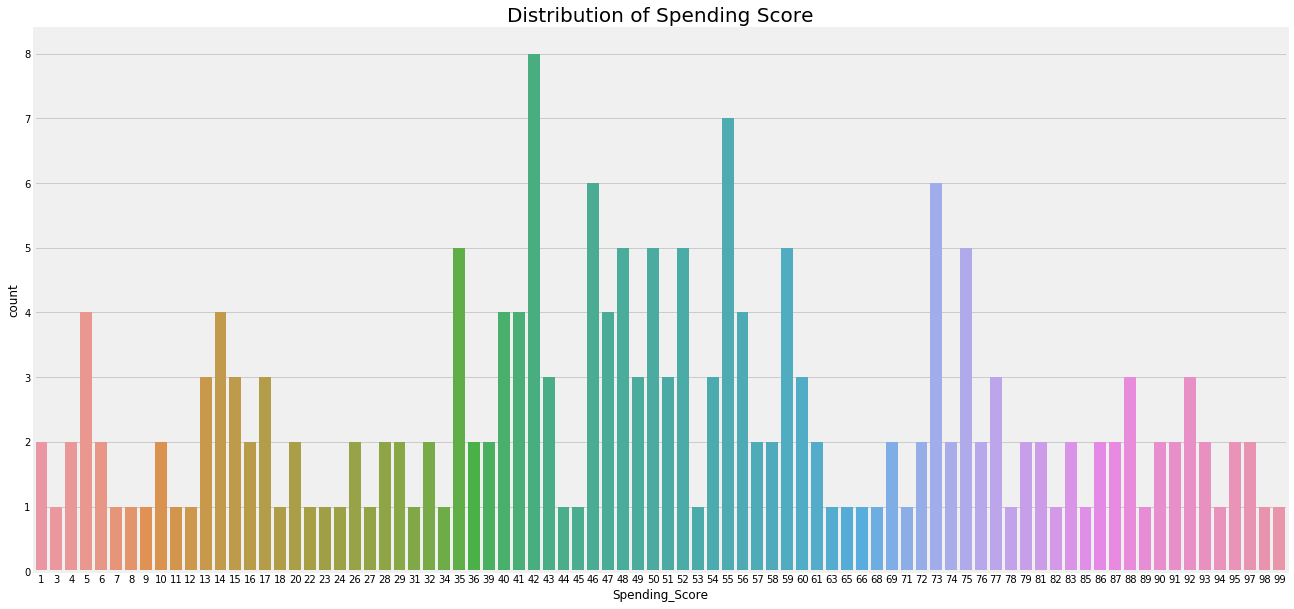

In [14]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['Spending_Score'])
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

In [15]:
data['Spending_Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

쇼핑몰 방문객의 소비 점수 빈도는 42점일 때 가장 높았다. 소비 점수 역시 연간 수입과 동일하게 중간층에 대체로 몰려있는 형태를 보여준다. 소비 점수의 분포는 1점부터 99점까지 존재하는 데, 소비 점수가 최소 1점 최대 100점임을 감안한다면 해당 쇼핑몰은 다양한 고객층을 대상으로 하고 있다.

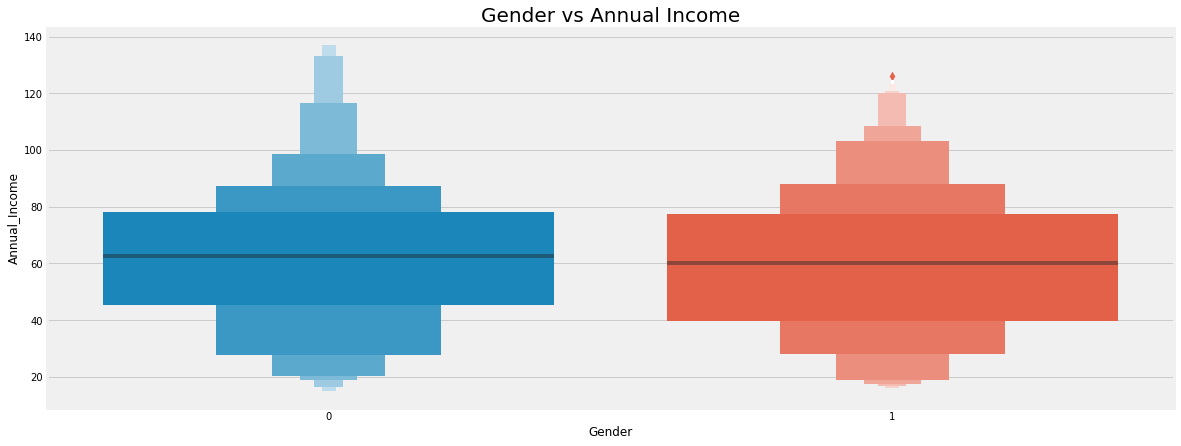

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Annual_Income'])
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

고소즉자의 경우 남성이 여성보다 많은 편이며, 저소득자의 경우 남성과 여성 모두 유사한 편이다.

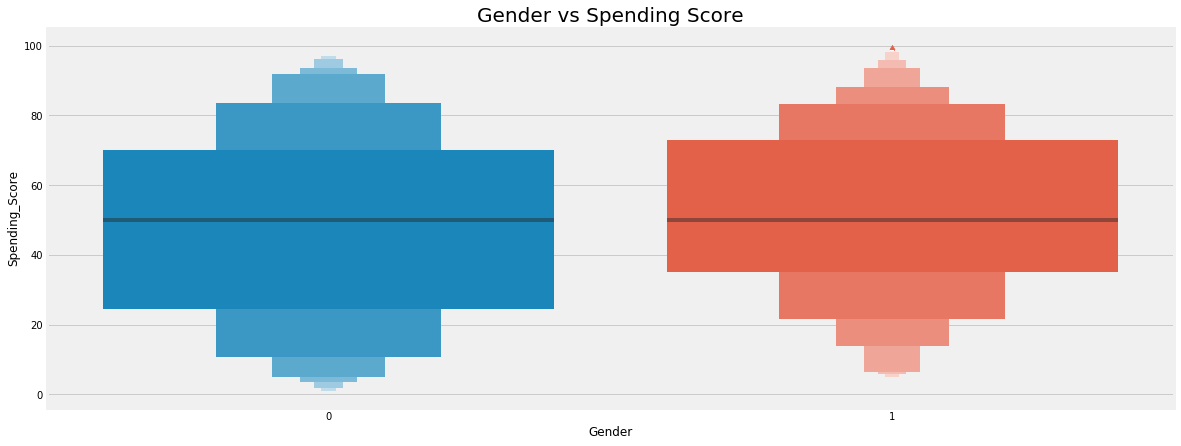

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending_Score'])
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

여성의 소비점수가 남성보다 전체적으로 높다.

---
### Clustering

### 1. Age - Spending Score

In [18]:
AS = data.iloc[:, [1, 3]].values  #Age, spending score

#### Elbow - 최적의 K 찾기!

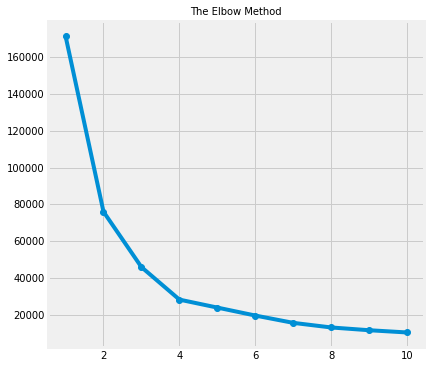

In [19]:
from sklearn.cluster import KMeans

el = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km.fit(AS)
    el.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (6, 6)    
plt.plot(range(1, 11), el, marker='o')
plt.title('The Elbow Method', fontsize = 10)
plt.show()

k = 4일 때 elbow 부분이므로, 최적의 k의 개수는 4이다.
#### 1. KMeans Clstering

No handles with labels found to put in legend.


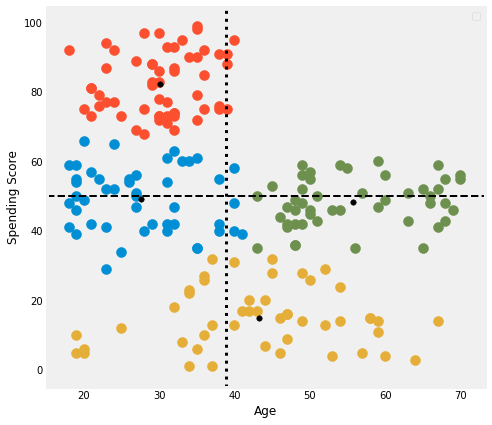

In [20]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(AS)

plt.rcParams['figure.figsize'] = (7, 7)

plt.scatter(AS[ymeans == 0, 0], AS[ymeans == 0, 1], s = 100)
plt.scatter(AS[ymeans == 1, 0], AS[ymeans == 1, 1], s = 100)
plt.scatter(AS[ymeans == 2, 0], AS[ymeans == 2, 1], s = 100)
plt.scatter(AS[ymeans == 3, 0], AS[ymeans == 3, 1], s = 100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black')

plt.axhline(data['Spending_Score'].mean(),0, 1, color='black', linestyle='--', linewidth='2')
plt.axvline(data['Age'].mean(), 0, 1, color='black', linestyle=':', linewidth='3')

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

고객의 연령에 따른 소비 점수는 총 4개의 군집으로 나뉘어 진다. 이때, 각 군집은 해당 특성이 존재한다.  
<br>
빨강 : 소비 점수가 매우 높은 우선 고객 (젊은 연령층이라는 특징)  
파랑 : 연령과 소비 점수 모두 기댓값인 보통 고객  
초록 : 소비 점수는 평균이나, 연령층이 높은 노년 고객  
노랑 : 소비 점수는 평균 아래 지만 전 연령대인 고객  
검정 : 각 군집의 중심

#### 2. Hierarchial Clustering

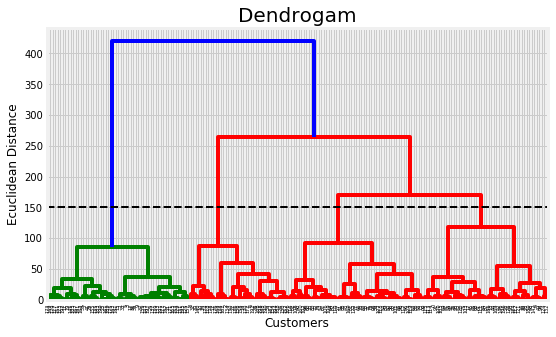

In [21]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(8,5))
dendrogram = sch.dendrogram(sch.linkage(AS, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [150, 150], '--', c='black', linewidth=2)  # 4개의 클러스터가 생기는 지점

plt.show()

No handles with labels found to put in legend.


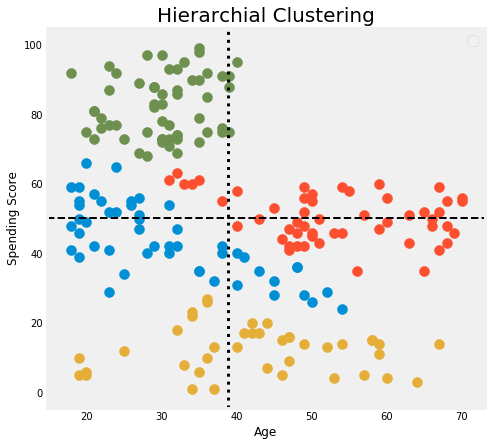

In [22]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(AS)

plt.figure(figsize=(7, 7))

plt.scatter(AS[y_hc == 0, 0], AS[y_hc == 0, 1], s = 100)
plt.scatter(AS[y_hc == 1, 0], AS[y_hc == 1, 1], s = 100)
plt.scatter(AS[y_hc == 2, 0], AS[y_hc == 2, 1], s = 100)
plt.scatter(AS[y_hc == 3, 0], AS[y_hc == 3, 1], s = 100)
plt.scatter(AS[y_hc == 4, 0], AS[y_hc == 4, 1], s = 100)

plt.axhline(data['Spending_Score'].mean(),0, 1, color='black', linestyle='--', linewidth='2')
plt.axvline(data['Age'].mean(), 0, 1, color='black', linestyle=':', linewidth='3')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

앞서, 구한 kmeans와 유사한 형태지만 spending score의 평균 부분의 경우 kmeans clustering과 다른 양상을 보인다.

### 2. Annual Income - Spending Score

#### Elbow - 최적의 k 찾기!

In [23]:
ANS = data.iloc[:, [2, 3]].values  #Annual Income, spending score

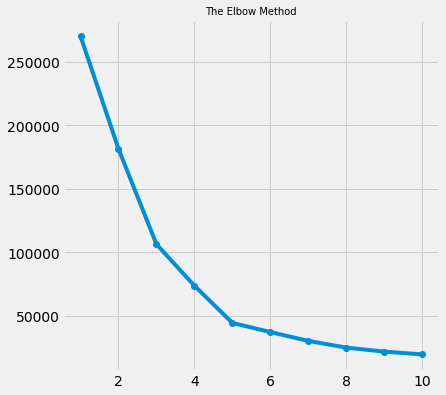

In [24]:
el = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km.fit(ANS)
    el.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (6, 6)    
plt.plot(range(1, 11), el, marker='o')
plt.title('The Elbow Method', fontsize = 10)
plt.show()

k = 5일 때 elbow 부분이므로, 최적의 k의 개수는 5이다.
#### 1. KMeans Clstering

No handles with labels found to put in legend.


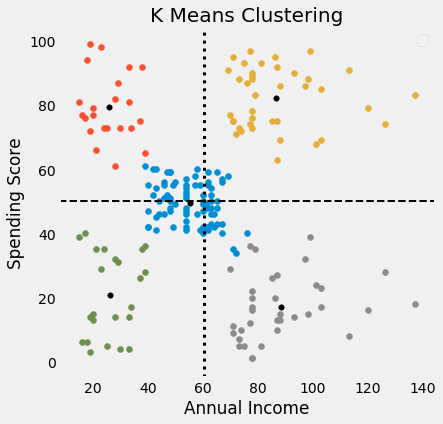

In [25]:
#시각화
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(ANS)

plt.scatter(ANS[y_means == 0, 0], ANS[y_means == 0, 1])
plt.scatter(ANS[y_means == 1, 0], ANS[y_means == 1, 1])
plt.scatter(ANS[y_means == 2, 0], ANS[y_means == 2, 1])
plt.scatter(ANS[y_means == 3, 0], ANS[y_means == 3, 1])
plt.scatter(ANS[y_means == 4, 0], ANS[y_means == 4, 1])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 30, c = 'black')

plt.axhline(data['Spending_Score'].mean(),0, 1, color='black', linestyle='--', linewidth='2')
plt.axvline(data['Annual_Income'].mean(), 0, 1, color='black', linestyle=':', linewidth='3')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()

고객의 연간 수입에 따른 소비 점수는 총 5개의 군집으로 나뉘어 진다. 이때, 각 군집은 해당 특성이 존재한다.  
<br>
빨강 : 연간 수입은 낮지만, 소비 점수가 높은 고객  
파랑 : 연간 수입과 소비 점수 모두 일반적인 고객  
초록 : 연간 수입과 소비 점수 모두 낮은 고객  
노랑 : 연간 수입과 소비 점수 모두 높은 고객  
회색 : 연간 수입은 높지만, 소비 점수가 낮은 구두쇠 고객  
검정 : 각 군집의 중심

#### 2. Hierarchial Clustering

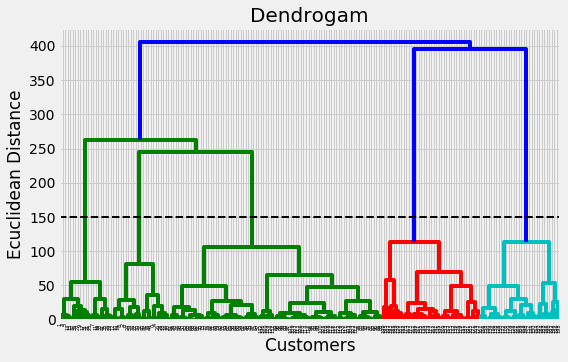

In [26]:
plt.figure(figsize=(8,5))
dendrogram = sch.dendrogram(sch.linkage(ANS, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [150, 150], '--', c='black', linewidth=2)  # 5개의 클러스터가 생기는 지점

plt.show()

No handles with labels found to put in legend.


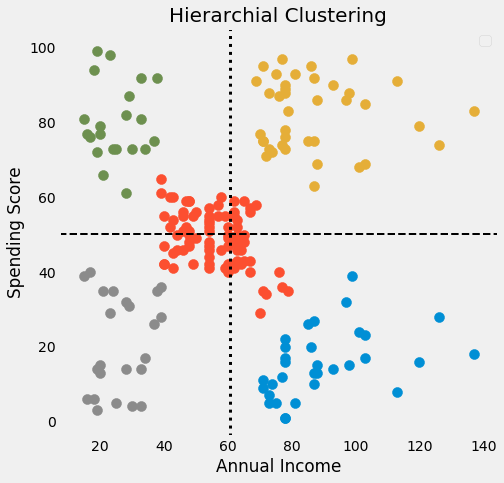

In [27]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(ANS)

plt.figure(figsize=(7, 7))

plt.scatter(ANS[y_hc == 0, 0], ANS[y_hc == 0, 1], s = 100)
plt.scatter(ANS[y_hc == 1, 0], ANS[y_hc == 1, 1], s = 100)
plt.scatter(ANS[y_hc == 2, 0], ANS[y_hc == 2, 1], s = 100)
plt.scatter(ANS[y_hc == 3, 0], ANS[y_hc == 3, 1], s = 100)
plt.scatter(ANS[y_hc == 4, 0], ANS[y_hc == 4, 1], s = 100)

plt.axhline(data['Spending_Score'].mean(),0, 1, color='black', linestyle='--', linewidth='2')
plt.axvline(data['Annual_Income'].mean(), 0, 1, color='black', linestyle=':', linewidth='3')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

Kmeans clustering과 거의 동일하다.

#### 3. DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

for min_sample in [3, 5, 7, 9, 11]:
    for eps in [0.05, 0.2, 0.4, 0.9, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
        dbscan = DBSCAN(min_samples=min_sample, eps=eps)
        labels = dbscan.fit_predict(ANS) 
        print('︎=== min_sample:{}, eps:{} ==='.format(min_sample, eps))

        print('')

        print('cluster 수: {}'.format(len(np.unique(labels))))

        print('cluster 크기: {}\n'.format(np.bincount(labels+1)))

︎=== min_sample:3, eps:0.05 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:0.2 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:0.4 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:0.9 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:1 ===

cluster 수: 7
cluster 크기: [179   3   3   5   3   4   3]

︎=== min_sample:3, eps:3 ===

cluster 수: 12
cluster 크기: [101   3  13   4   3  49   6   5   4   4   4   4]

︎=== min_sample:3, eps:5 ===

cluster 수: 13
cluster 크기: [55  3  6  3  4  5  3 79 11 10 14  3  4]

︎=== min_sample:3, eps:7 ===

cluster 수: 13
cluster 크기: [16 12  6  7  3  3  3  5 87 28 14 12  4]

︎=== min_sample:3, eps:9 ===

cluster 수: 8
cluster 크기: [11  7 18 12  3 89 32 28]

︎=== min_sample:3, eps:11 ===

cluster 수: 4
cluster 크기: [ 10 154   3  33]

︎=== min_sample:3, eps:13 ===

cluster 수: 3
cluster 크기: [  9 157  34]

︎=== min_sample:3, eps:15 ===

cluster 수: 1
cluster 크기: [  0 200]

︎=== min_sample:3, eps:17 ===

cluster 수: 1
cluster 크기: [  

︎cluster 수가 5이면서 균등히 분배 되었다고 보이는 결과 선택  


                        === min_sample:11, eps:11 ===

                        cluster 수: 5
                        cluster 크기: [49 11 88 30 22]

No handles with labels found to put in legend.


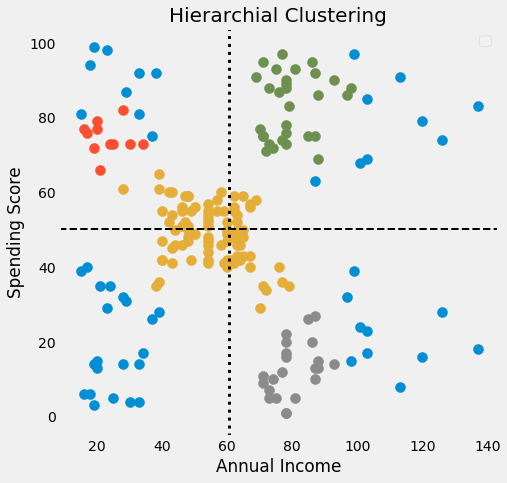

In [29]:
# DBSCAN 적용
np.random.seed(0)
dbscan = DBSCAN(eps=11, min_samples=11)
y_db = dbscan.fit_predict(ANS)

plt.figure(figsize=(7, 7))

plt.scatter(ANS[y_db == -1, 0], ANS[y_db == -1, 1], s = 100)
plt.scatter(ANS[y_db == 0, 0], ANS[y_db == 0, 1], s = 100)
plt.scatter(ANS[y_db == 1, 0], ANS[y_db == 1, 1], s = 100)
plt.scatter(ANS[y_db == 2, 0], ANS[y_db == 2, 1], s = 100)
plt.scatter(ANS[y_db == 3, 0], ANS[y_db == 3, 1], s = 100)

plt.axhline(data['Spending_Score'].mean(),0, 1, color='black', linestyle='--', linewidth='2')
plt.axvline(data['Annual_Income'].mean(), 0, 1, color='black', linestyle=':', linewidth='3')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

앞서 다른 clustering 방법과 비교했을 때, 성능이 떨어진다.  
밀도 기반의 clustering 기법이므로 밀접된 데이터에 대해서는 군집화가 어렵다.

---

In [30]:
x = data[['Age', 'Spending_Score', 'Annual_Income']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)

labels = km.labels_
centroids = km.cluster_centers_

In [31]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending_Score'],
    z= data['Annual_Income'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

앞서, Age와 Annual_Income 변수와 Spending_Score 변수 간의 군집화를 진행한 결과 각각의 변수를 통해 의미있는 고객들은 나눌 수 있었다. 각 군집화는 2차원에서 진행하였기 때문에 모든 변수를 고려한 군집화를 시각화하면 다음과 같다.

---
### 실루엣 계수

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans = KMeans(n_clusters=5, init="k-means++")
agg = AgglomerativeClustering(n_clusters=5, linkage='ward') 
dbscan = DBSCAN(eps=11, min_samples=11)


algorithms = [kmeans, agg, dbscan]

for i in algorithms:
    clusters = i.fit_predict(data)
    print(i.__class__.__name__, ':', silhouette_score(data, clusters))

KMeans : 0.44473703994455477
AgglomerativeClustering : 0.44030137602541636
DBSCAN : 0.03855067600291231


Kmeans와 Hierarchial Clustering의 실루엣 계수는 유사한 편이나, Kmeans 기법이 조금 더 우세하다. 또한, DBSCAN의 실루엣 계수가 가장 낮은 편인데, 앞서 clustering을 시각화하였을 때 DBSCAN 기법이 다른 기법에 비해 제대로 군집화가 진행이 안되었던 것을 보아 타당한 분석이었다고 볼 수 있다.